# 1. Matriu de confusió

Respon els apartats a, b i c sobre el codi següent.

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


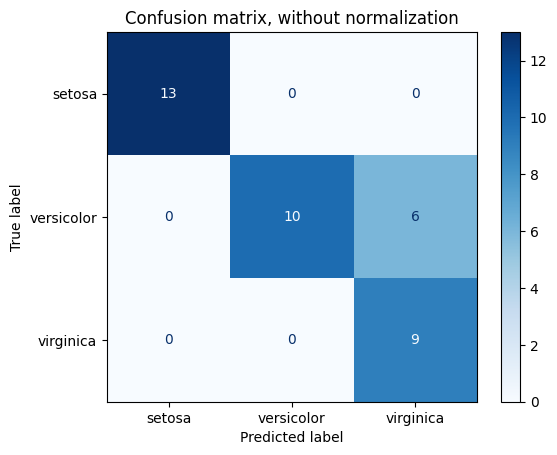

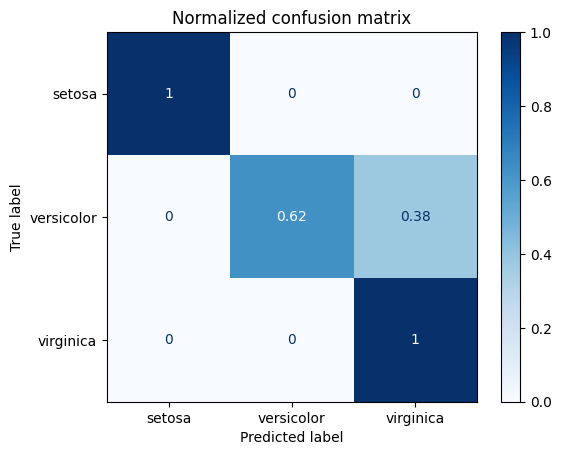

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
	("Confusion matrix, without normalization", None),
	("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
	disp = ConfusionMatrixDisplay.from_estimator(
		classifier,
		X_test,
		y_test,
		display_labels=class_names,
		cmap=plt.cm.Blues,
		normalize=normalize,
	)
	disp.ax_.set_title(title)

	print(title)
	print(disp.confusion_matrix)

plt.show()

a) Afegeix codi que mostri quina és la mida dels conjunts d'entrenament i validació.

In [13]:
print('Training set shape:')
print(f'> X_train shape: {str(X_train.shape)}')
print(f'> y_train shape: {str(y_train.shape)}')
print('Validation set shape:')
print(f'> X_test shape: {str(X_test.shape)}')
print(f'> y_test shape: {str(y_test.shape)}')


Training set shape:
> X_train shape: (112, 4)
> y_train shape: (112,)
Validation set shape:
> X_test shape: (38, 4)
> y_test shape: (38,)


b) Quin model de classificació s'està usant?

Se está utilitzant el model **SVM** (_Suppport Verctor Machine_).

c) De quin càlcul surten els nombres 0.62 i 0.38?

La segona fila de l'array de sortida es _[ 0 10  6]_, el total de la fila es 16, per això:

- **0.68** ~= 10/16
- **0.38** ~= 6/16

Si sumam les dues cuantitats donará **1**.

d) Modifica els valors dels vectors **y_true** i **y_pred**, sense canviar la longitud dels vectors, de forma que els **falsos positius** (fp) augmentin en una unitat i els **veritables negatius** (tn) davallin una unitat.

In [14]:
# ORIGINAL CODE
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1, 0]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(np.int64(2), np.int64(1), np.int64(3), np.int64(3))

In [15]:
# MODIFIED CODE
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1]
y_pred = [1, 1, 0, 1, 0, 1, 0, 1, 0] # changed the first value from 0 to 1
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(np.int64(1), np.int64(2), np.int64(3), np.int64(3))

# 2. Corba ROC

In [16]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
	X_train,
	X_test,
	y_train,
	y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [17]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

np.int64(2)

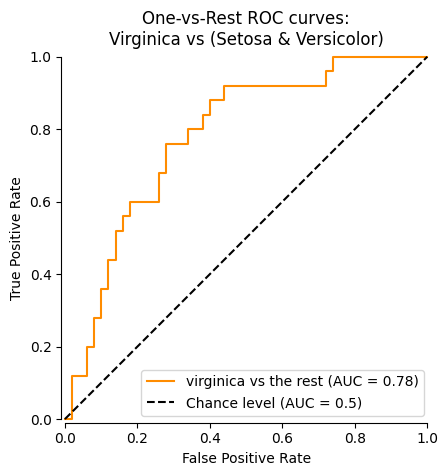

In [18]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
	y_onehot_test[:, class_id],
	y_score[:, class_id],
	name=f"{class_of_interest} vs the rest",
	color="darkorange",
	plot_chance_level=True,
	despine=True,
)
_ = display.ax_.set(
	xlabel="False Positive Rate",
	ylabel="True Positive Rate",
	title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

In [19]:
from sklearn.metrics import roc_auc_score
auc_virginica = roc_auc_score(y_onehot_test[:, class_id], y_score[:, class_id])
print(f"AUC for Virginica: {auc_virginica:.2f}")

AUC for Virginica: 0.78


a) Explicau el significat de la línia negra discontínua, de pendent 1.

La línia discontinua negra representa la corba ROC d'un classificador aleatori. Això vol dir que el classificador no té capacitat de distingir entre classes positives i negatives, i el model prediu a l'atzar.
- Pendent d'1: Representa que la taxa de veritables positius (TPR) i la taxa de falsos positius (FPR) són iguals, cosa que implica que el classificador no té habilitat per diferenciar entre classes.
- Significat: Un model útil ha de tenir la corba ROC per sobre d'aquesta línia per indicar que és millor que un classificador aleatori.

b) Obteniu el valor i el gràfic de l'àrea sota la corba per a la classe "setosa", amb les etiquetes corresponents.

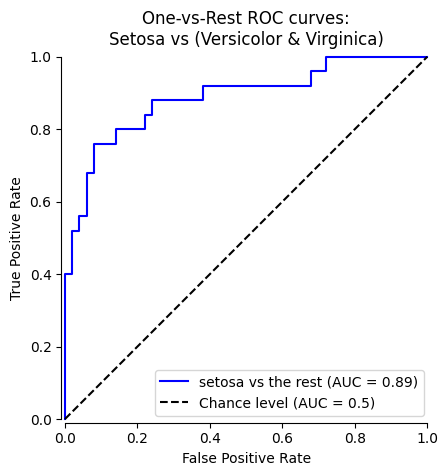

In [20]:
class_of_interest = "setosa"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

display_setosa = RocCurveDisplay.from_predictions(
	y_onehot_test[:, class_id],
	y_score[:, class_id],
	name=f"{class_of_interest} vs the rest",
	color="blue",
	plot_chance_level=True,
	despine=True,
)
_ = display_setosa.ax_.set(
	xlabel="False Positive Rate",
	ylabel="True Positive Rate",
	title="One-vs-Rest ROC curves:\nSetosa vs (Versicolor & Virginica)",
)
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
auc_setosa = roc_auc_score(y_onehot_test[:, class_id], y_score[:, class_id])
print(f"AUC for Setosa: {auc_setosa:.2f}")

AUC for Setosa: 0.89


c) Obteniu el valor i el gràfic de l'àrea sota la corba de la classe "virginica", amb les etiquetes corresponents.

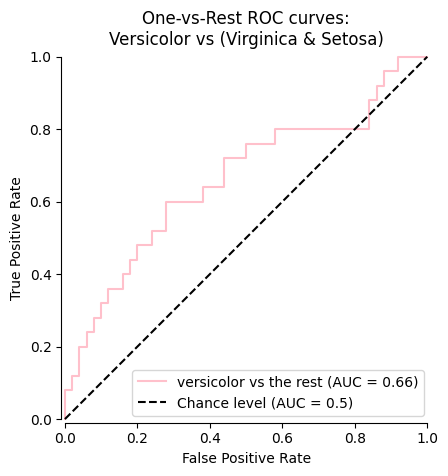

In [22]:
# I assume the statement refers to 'versicolor' since the example provided refers to the value 'virginica'
class_of_interest = "versicolor"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

display_setosa = RocCurveDisplay.from_predictions(
	y_onehot_test[:, class_id],
	y_score[:, class_id],
	name=f"{class_of_interest} vs the rest",
	color="pink",
	plot_chance_level=True,
	despine=True,
)
_ = display_setosa.ax_.set(
	xlabel="False Positive Rate",
	ylabel="True Positive Rate",
	title="One-vs-Rest ROC curves:\nVersicolor vs (Virginica & Setosa)",
)
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
auc_virginica = roc_auc_score(y_onehot_test[:, class_id], y_score[:, class_id])
print(f"AUC for Virginica: {auc_virginica:.2f}")

AUC for Virginica: 0.66


d) Ordenau les tres classes per qualitat de classificació, d'acord amb la seva àrea sota la corba.

In [24]:
auc_scores = {}
for class_name in label_binarizer.classes_:
	class_id = np.flatnonzero(label_binarizer.classes_ == class_name)[0]
	auc = roc_auc_score(y_onehot_test[:, class_id], y_score[:, class_id])
	auc_scores[class_name] = auc
	print(f"AUC for {class_name}: {auc:.4f}")

# Ordenar por AUC
sorted_auc = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)
print("\nOrder of the classes by classification quality (from highest to lowest AUC):")
for class_name, auc in sorted_auc:
	print(f"{class_name}: {auc:.4f}")

AUC for setosa: 0.8872
AUC for versicolor: 0.6608
AUC for virginica: 0.7800

Order of the classes by classification quality (from highest to lowest AUC):
setosa: 0.8872
virginica: 0.7800
versicolor: 0.6608


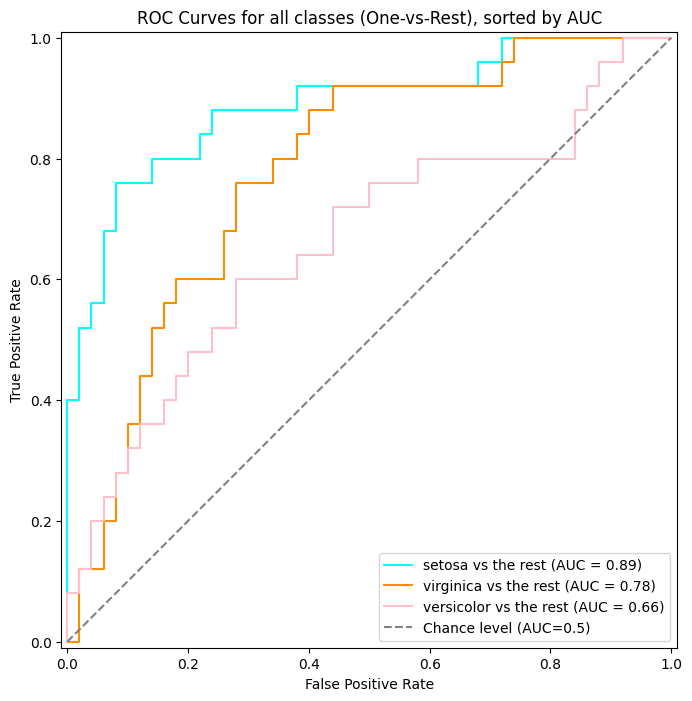

In [25]:
# All 3 charts combined comparison
colors = {
	"setosa": "cyan",
	"virginica": "darkorange",
	"versicolor": "pink",
}

plt.figure(figsize=(8, 8))
for class_name, _ in sorted_auc:
	class_id = np.flatnonzero(label_binarizer.classes_ == class_name)[0]
	RocCurveDisplay.from_predictions(
		y_onehot_test[:, class_id],
		y_score[:, class_id],
		name=f"{class_name} vs the rest",
		ax=plt.gca(),
		plot_chance_level=False,
		color=colors[class_name],
	)

# Add probability level line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance level (AUC=0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for all classes (One-vs-Rest), sorted by AUC")
plt.legend(loc="lower right")
plt.show()

# 3. Corbes de validació

In [26]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 3),)
print(f'Training scores:\n{train_scores}')
print(f'Valid scores:\n{valid_scores}')

Training scores:
[[0.91 0.94 0.92 0.89 0.93]
 [0.9  0.93 0.93 0.93 0.93]
 [0.97 1.   0.98 0.97 0.99]]
Valid scores:
[[0.9  0.9  0.9  0.97 0.9 ]
 [0.9  0.83 0.97 0.97 0.93]
 [1.   0.93 1.   1.   0.9 ]]


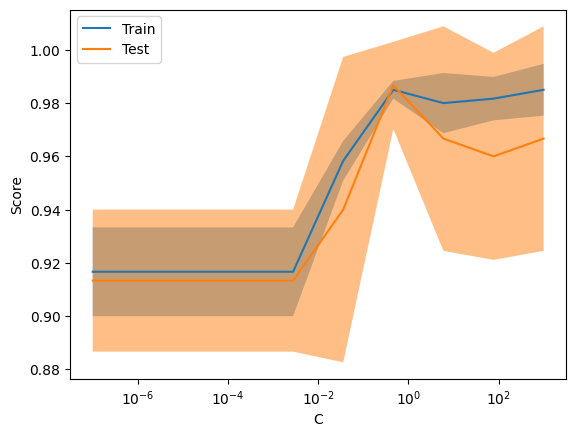

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle

X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
ValidationCurveDisplay.from_estimator(SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 10))

a) A la corba de validació anterior, modificau el codi perquè en lloc de potències de deu, mostri el resultat per a potències de 2, en un rang similar.

Training scores:
[[0.94 0.93 0.91 0.9  0.93]
 [0.95 0.93 0.93 0.93 0.95]
 [0.95 0.97 0.95 0.95 0.96]
 [0.97 0.97 0.96 0.97 0.97]
 [0.97 0.98 0.97 0.97 0.98]
 [0.97 0.98 0.97 0.99 0.99]
 [0.98 0.98 0.98 0.98 0.99]
 [0.98 0.99 0.98 0.99 0.99]
 [0.98 0.99 0.97 0.98 0.99]
 [0.98 0.99 0.97 0.97 0.99]
 [0.98 0.99 0.97 0.97 0.99]]
Valid scores:
[[0.9  0.87 0.93 0.97 0.93]
 [0.9  0.87 0.97 1.   0.93]
 [0.97 0.87 0.97 1.   0.93]
 [1.   0.87 1.   1.   0.93]
 [1.   0.93 1.   1.   0.93]
 [1.   0.93 1.   1.   0.9 ]
 [1.   0.97 1.   1.   0.97]
 [1.   0.93 1.   1.   0.97]
 [1.   0.93 1.   1.   0.9 ]
 [1.   0.93 1.   0.97 0.9 ]
 [1.   0.93 1.   0.97 0.9 ]]


Text(0.5, 0, 'C (Base 2)')

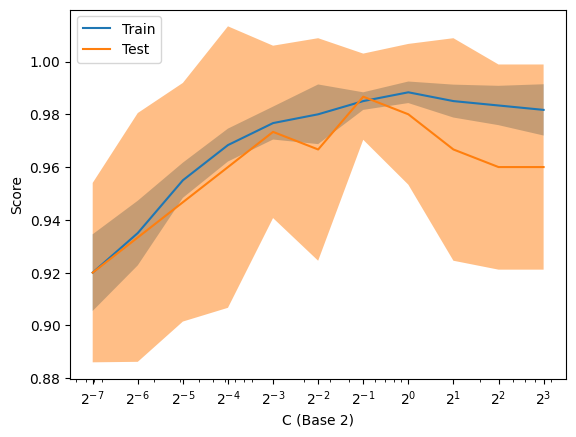

In [28]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_range = np.power(2.0, np.arange(-7, 4))

train_scores, valid_scores = validation_curve(SVC(kernel="linear"), X, y, param_name="C", param_range=param_range)
print(f'Training scores:\n{train_scores}')
print(f'Valid scores:\n{valid_scores}')

X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
ValidationCurveDisplay.from_estimator(SVC(kernel="linear"), X, y, param_name="C", param_range=param_range)
plt.xticks(param_range, [f"$2^{{{int(np.log2(c))}}}$" for c in param_range])
plt.xlabel("C (Base 2)")

b) Quin és en aquest cas el punt d'equilibri entre infraajust i sobreajust?

El punt d'equilibri entre el subajustament i el sobreajustament és on les corbes d'entrenament i prova estan el més properes possible mentre mantenen un rendiment alt en totes dues. En el cas d'aquesta gráfica resultant, es pot observar que el punt d'equilibri estarà al voltant de **C = 2^0** i **C = 2^1**.

# 4. Regressió

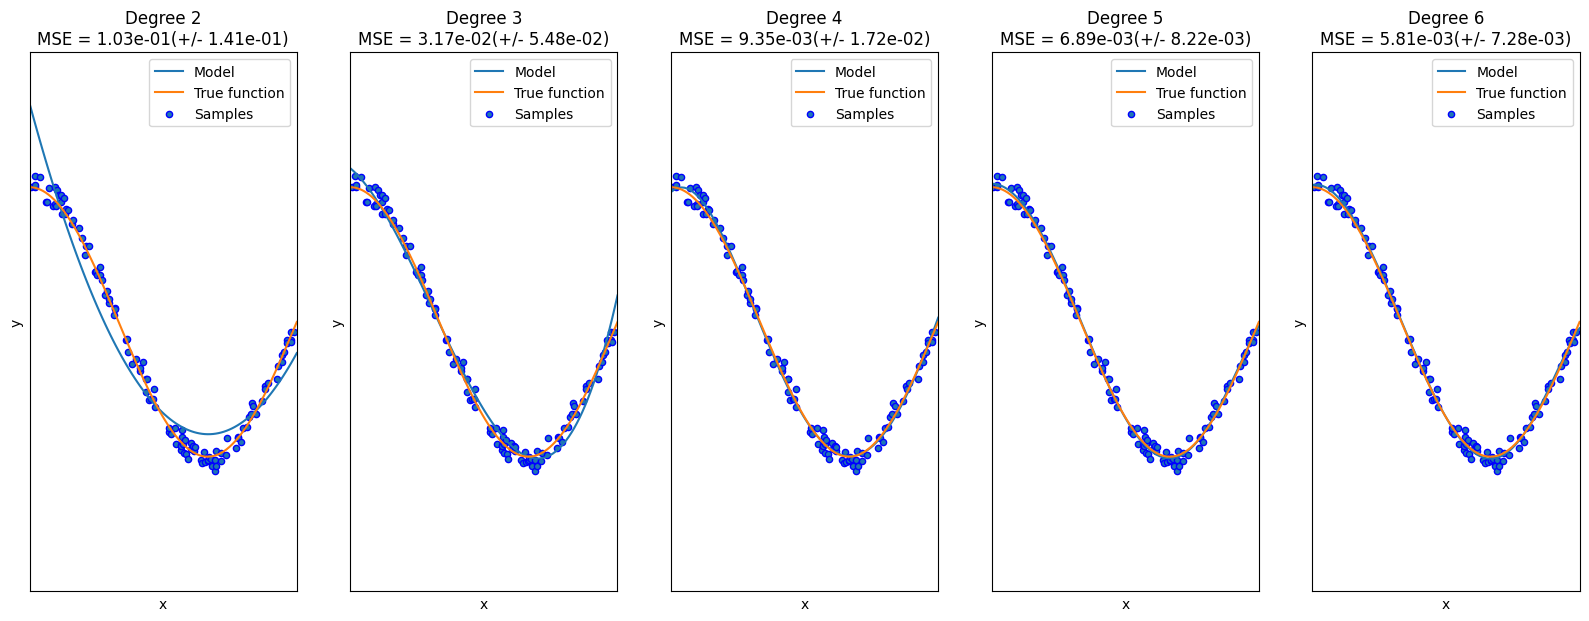

In [29]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
	return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 120
degrees = [ 2, 3, 4, 5, 6]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.05

plt.figure(figsize=(20, 7))
for i in range(len(degrees)):
	ax = plt.subplot(1, len(degrees), i + 1)
	plt.setp(ax, xticks=(), yticks=())

	polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
	linear_regression = LinearRegression()
	pipeline = Pipeline(
		[
			("polynomial_features", polynomial_features),
			("linear_regression", linear_regression),
		]
	)
	pipeline.fit(X[:, np.newaxis], y)

	# Evaluate the models using crossvalidation
	scores = cross_val_score(
		pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
	)

	X_test = np.linspace(0, 1, 100)
	plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
	plt.plot(X_test, true_fun(X_test), label="True function")
	plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
	plt.xlabel("x")
	plt.ylabel("y")
	plt.xlim((0, 1))
	plt.ylim((-2, 2))
	plt.legend(loc="best")
	plt.title(
		"Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
			degrees[i], -scores.mean(), scores.std()
		)
	)
plt.show()

a) Quan els graus dels polinomis són 1,4 i 15 està clar que el millor ajust es produeix per al grau 4. Ara bé, afinem una mica més al voltant de 4. Per això, modificau el vector de graus perquè contengui els valors 2, 3, 4, 5,6.

La modificació que es demana per aquest apartat ya està realitzada en el codi proporcionat en l'enunciat, pel que el resultat que es mostra es el demanat.

b) Quin és en aquest cas el grau que obté un valor més baix d'error quadràtic mitjà? Quin és aquest valor?

El grau que obté el valor d'error quadràtic mitjà més baix (MSE) és el grau 6, amb un valor de:

MSE = 5.81 \times 10^{-3} \pm 7.28 \times 10^{-3}

c) Correspon amb el gràfic més ajustat entre les corbes blava i taronja?

No al complet ja que la corva per al grau 5 també s'ajusta molt be a la corva de la funció vertadera, encara que l'error quadràtic mitjà sigui major que per al grau 6.

d) Duplicau el nombre de mostres preses (n_samples). En aquest cas coincideixen l'error quadràtic mitjà i les corbes més coincidents? Per a quin grau del polinomi?

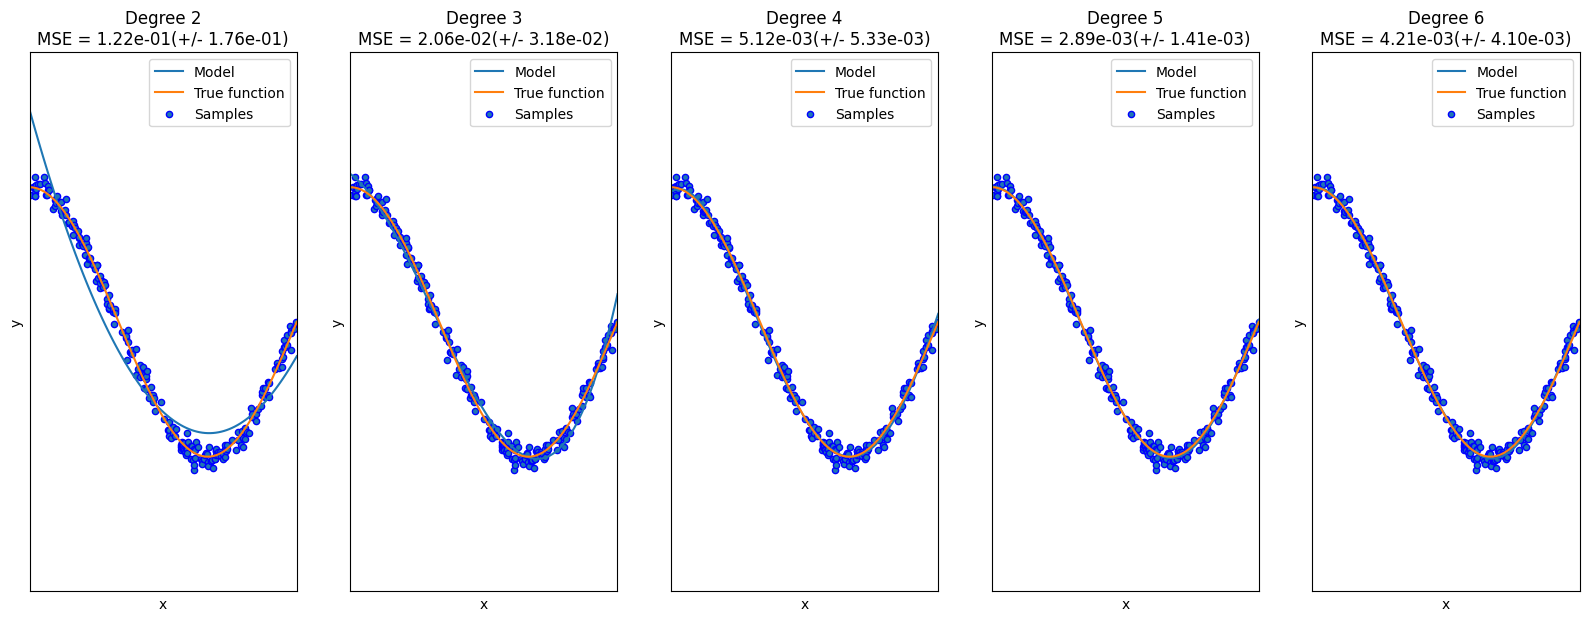

In [30]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
	return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 240
degrees = [ 2, 3, 4, 5, 6]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.05

plt.figure(figsize=(20, 7))
for i in range(len(degrees)):
	ax = plt.subplot(1, len(degrees), i + 1)
	plt.setp(ax, xticks=(), yticks=())

	polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
	linear_regression = LinearRegression()
	pipeline = Pipeline(
		[
			("polynomial_features", polynomial_features),
			("linear_regression", linear_regression),
		]
	)
	pipeline.fit(X[:, np.newaxis], y)

	# Evaluate the models using crossvalidation
	scores = cross_val_score(
		pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
	)

	X_test = np.linspace(0, 1, 100)
	plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
	plt.plot(X_test, true_fun(X_test), label="True function")
	plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
	plt.xlabel("x")
	plt.ylabel("y")
	plt.xlim((0, 1))
	plt.ylim((-2, 2))
	plt.legend(loc="best")
	plt.title(
		"Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
			degrees[i], -scores.mean(), scores.std()
		)
	)
plt.show()

Augmentant el nombre de mostres, com era d'esperar, el model s'ajusta millor en graus menors (es pot veure que amb grau 4 ja ajusta molt bé) i els errors quadràtics disminuiran. Així però, augmentant el nombre de mostres es pot produïr un sobreajust del model a major grau (com pot ser el nostre cas, ja que de grau 5 a 6 no es mostren diferencies apreciables).